### Задание

#### Цель: 

Изучить применение методов по поиску выбросов в данных, попрактиковаться в обработке экстремальных значений.

#### Описание задания:

В домашнем задании нужно решить задачу классификации типа стекол. 
Данные для обучения моделей можно скачать с сайта. Целевая переменная – тип стекла «Type».
Остальные признаки описывают химические элементы в составе материала.
Датасет нужно исследовать на наличие выбросов, провести EDA.

####  Этапы работы:

1. Получите данные и загрузите их в рабочую среду 

2. Проведите первичный анализ.

а) Проверьте количество записей для каждого класса. Сделайте вывод.

3. Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.

4. Обучите модель дерева решений RandomForestClassifier на обучающем множестве.

5. Для тестового множества предскажите тип стекла и сравните с истинным значением, посчитав точность предсказания модели (accuracy).

6. Обработайте выбросы в данных.

а) Визуализируйте распределение значений для каждой переменной. Можно использовать функции sns.boxplot, sns.distplot. Есть ли признаки с нормальным распределением?

b) Исследуйте признаки на выбросы несколькими способами.

c) Удалите выбросы. *Посчитайте процент удаленных записей от общего числа записей для каждого класса.

7. Повторите п. 4, п. 5.

8. Сформулируйте выводы по проделанной работе.

а) Кратко опишите, какие преобразования были сделаны с данными.

b) Сравните точность двух моделей.

c) Напишите свое мнение, нужно ли исследовать данные на выбросы, для чего это делается, плюсы и минусы подхода.

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd # Для работы с данными

import scipy.stats as stats
from scipy.stats import iqr
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов
import matplotlib.font_manager 
%matplotlib inline
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM
from sklearn import svm
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor

In [2]:
df = pd.read_csv('glass.csv')
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [4]:
df.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [5]:
df.value_counts()

RI       Na     Mg    Al    Si     K     Ca     Ba    Fe    Type
1.52213  14.21  3.82  0.47  71.77  0.11  9.57   0.00  0.00  1       2
1.51115  17.38  0.00  0.34  75.41  0.00  6.65   0.00  0.00  6       1
1.51848  13.64  3.87  1.27  71.96  0.54  8.32   0.00  0.32  2       1
1.51831  14.39  0.00  1.82  72.86  1.41  6.47   2.88  0.00  7       1
1.51832  13.33  3.34  1.54  72.14  0.56  8.99   0.00  0.00  3       1
                                                                   ..
1.51707  13.48  3.48  1.71  72.52  0.62  7.99   0.00  0.00  2       1
1.51708  13.72  3.68  1.81  72.06  0.64  7.88   0.00  0.00  2       1
1.51709  13.00  3.47  1.79  72.72  0.66  8.18   0.00  0.00  2       1
1.51711  12.89  3.62  1.57  72.96  0.61  8.11   0.00  0.00  2       1
1.53393  12.30  0.00  1.00  70.16  0.12  16.19  0.00  0.24  2       1
Length: 213, dtype: int64

In [6]:
df['Type'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [7]:
# Разделяем на тренировочные и тестовые данные

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='Type'),
                                                    df['Type'],
                                                    test_size=0.2,
                                                    random_state=1984)
X_train.shape, X_test.shape

((171, 9), (43, 9))

In [8]:
# Создаем модель RandomForest
clf_rf = RandomForestClassifier(random_state=1984)
clf_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=1984)

In [9]:
# проверяем полученные данные на тренировочных данных

clf_rf.score(X_train, y_train)

1.0

In [10]:
# проверяем полученные данные на тестовых данных

clf_rf.score(X_test, y_test)

0.6744186046511628

In [11]:
y_pred_rf = clf_rf.predict (X_test)

In [12]:
print(f'Отчет о классификации RandomForestClassifier \n {classification_report(y_test, y_pred_rf)}')

Отчет о классификации RandomForestClassifier 
               precision    recall  f1-score   support

           1       0.50      0.73      0.59        11
           2       0.79      0.58      0.67        19
           3       0.50      0.50      0.50         4
           5       0.50      1.00      0.67         1
           6       1.00      1.00      1.00         1
           7       1.00      0.86      0.92         7

    accuracy                           0.67        43
   macro avg       0.71      0.78      0.72        43
weighted avg       0.72      0.67      0.68        43



In [13]:
X = df.drop(columns='Type')
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


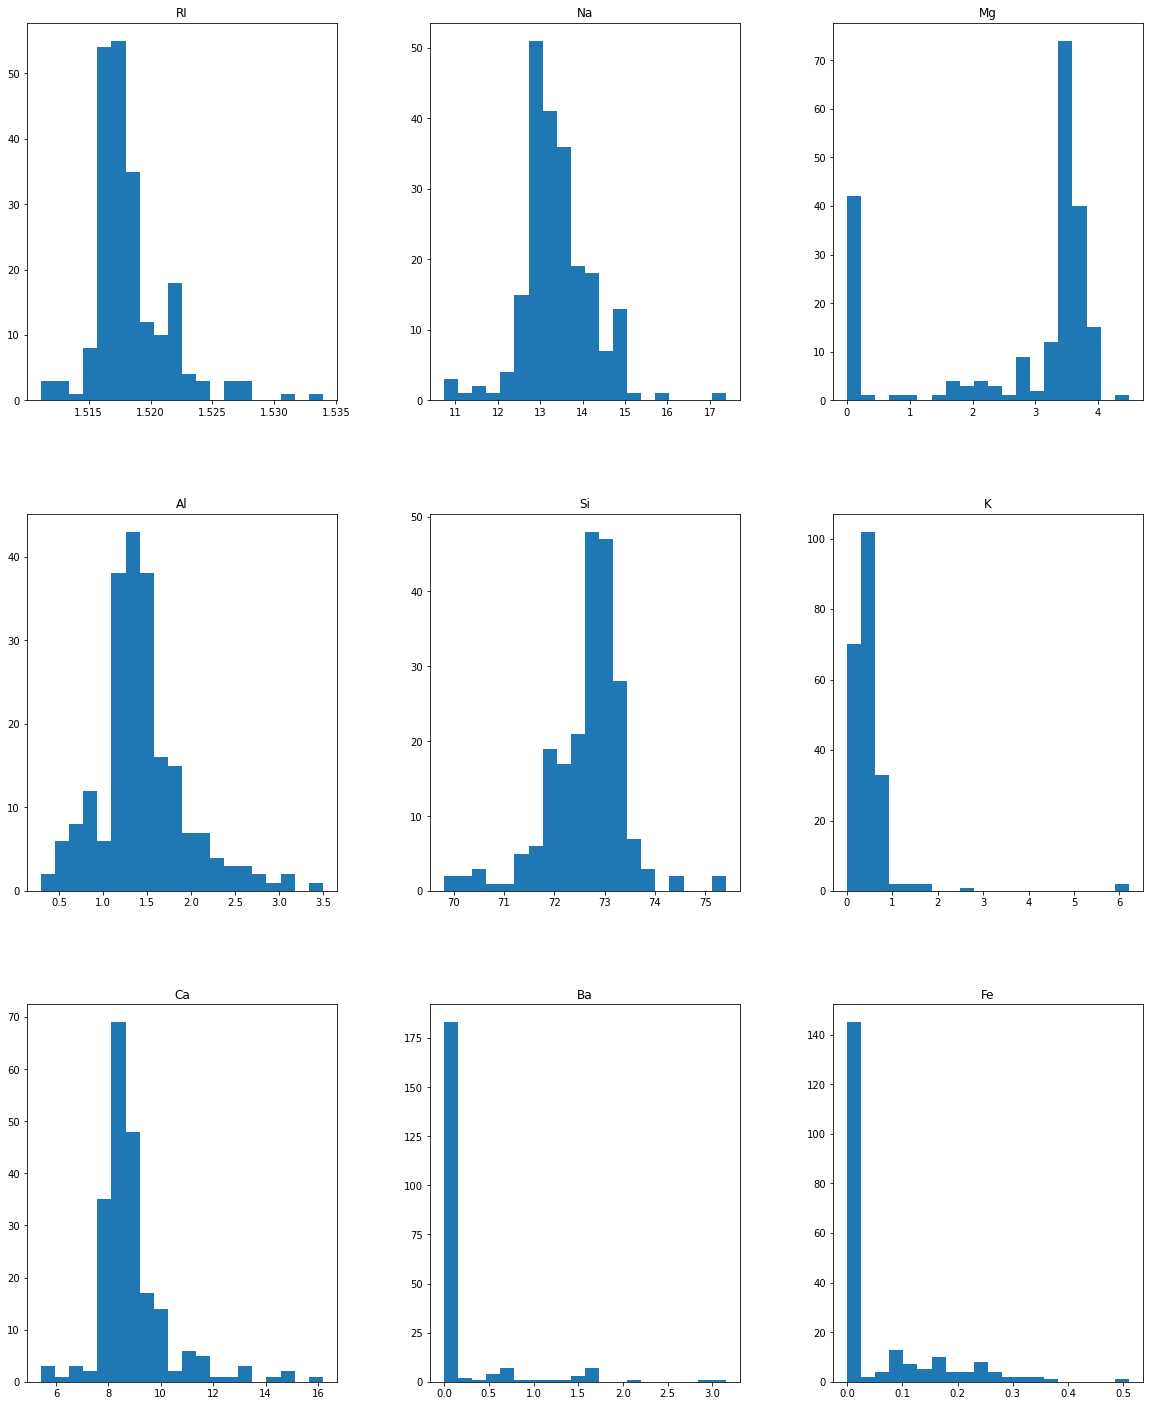

In [14]:
X.hist(figsize=(20, 25), bins=20, grid=False);

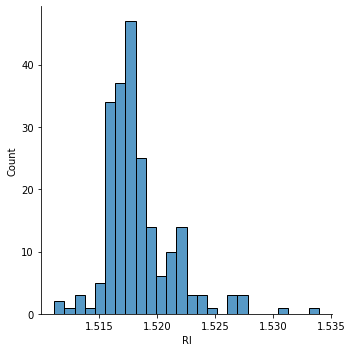

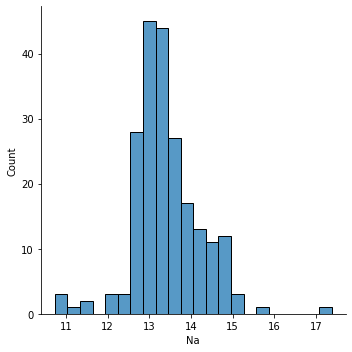

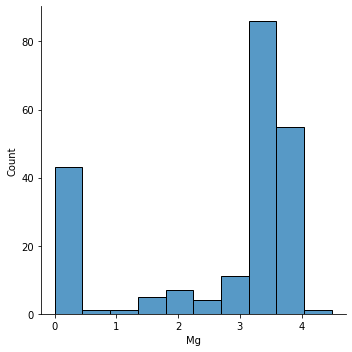

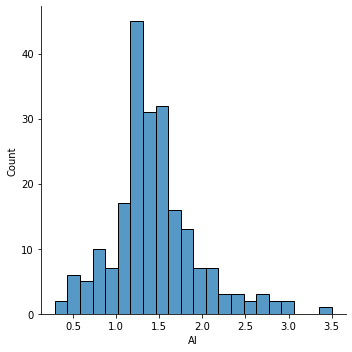

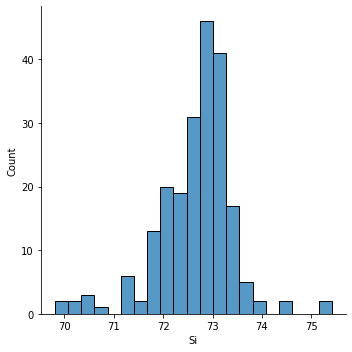

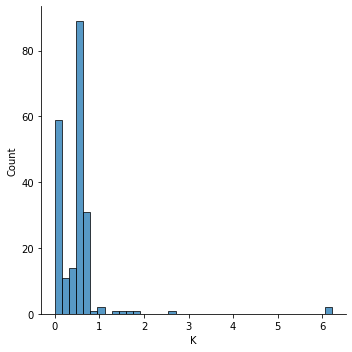

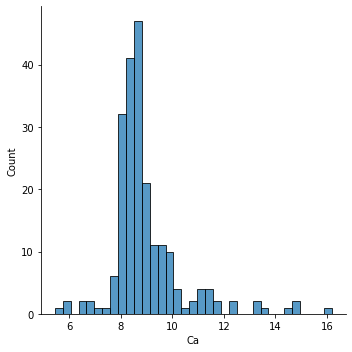

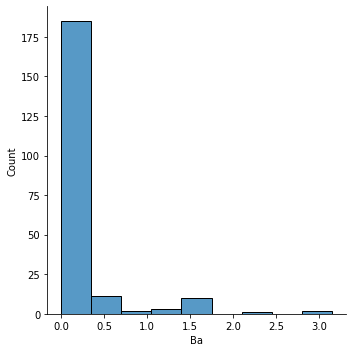

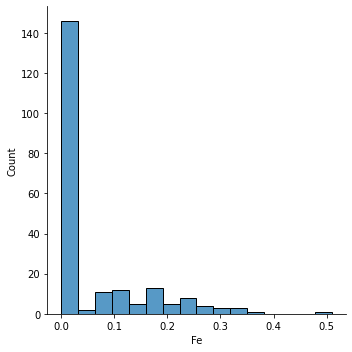

In [15]:
for name, values in X.iteritems ():
 sns.displot(values);

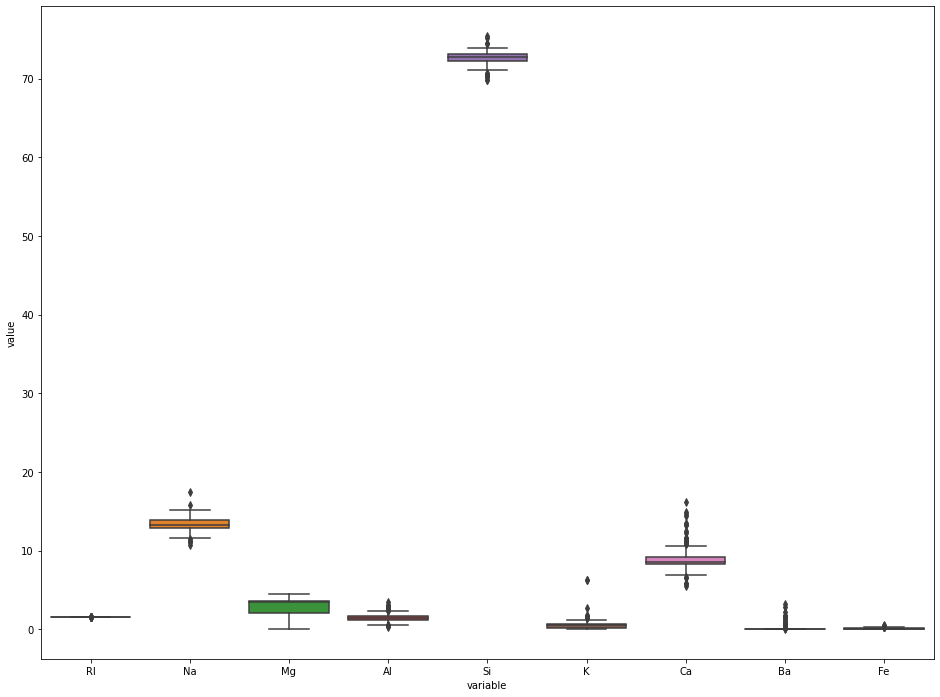

In [16]:
# Визуализирую выбросы. В связи с тем, что некоторые величины признаков сильно отличаются, 
# график малоинформативный. Основной элемент стекла - кремний (Si), поэтому такое смещение
plt.figure(figsize=(16, 12))
sns.boxplot(x="variable", y="value", data=pd.melt(X));

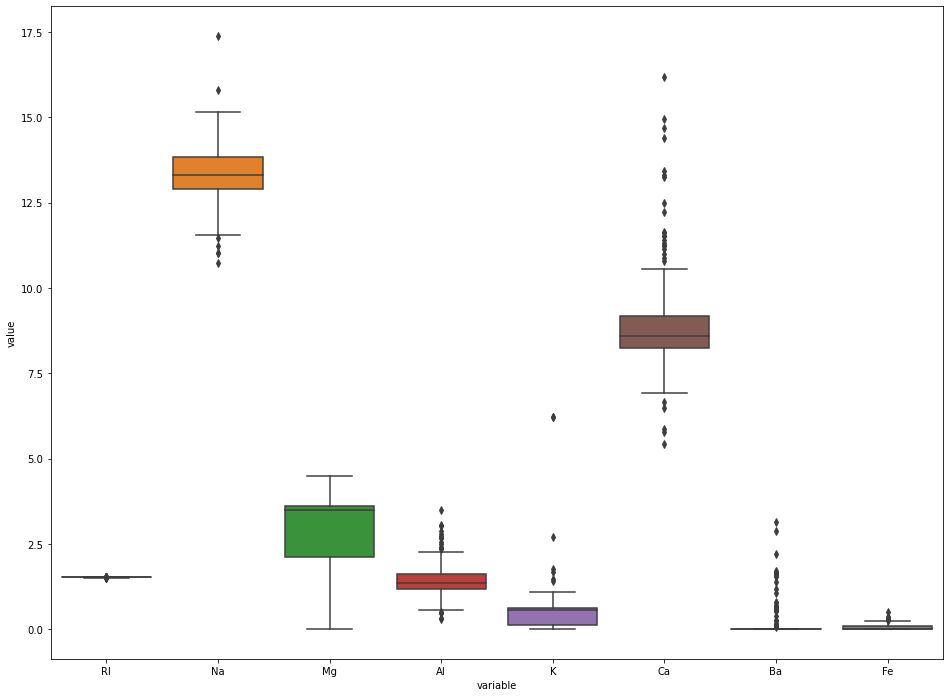

In [17]:
# Исключу кремний из графика, так более читаемо.
# Однако, чем больше признаков, тем сложнее визуализация.
# Буду искать выбросы процедурно

plt.figure(figsize=(16, 12))
sns.boxplot(x="variable", y="value", data=pd.melt(X.drop(columns='Si')));

Количественно выбросы можно найти через стандартизированную
оценку (z-оценку, z-score). Эта оценка показывает на сколько средних 
квадратических отклонений значение отличается от среднего.

In [18]:
z = pd.DataFrame(stats.zscore(df), columns = df.columns.tolist())
z.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451,-0.848275
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451,-0.848275
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451,-0.848275
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451,-0.848275
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451,-0.848275


In [19]:
# найдем те значения, которые отклоняются больше чем на три СКО
# технически, метод .any() выводит True для тех строк (axis = 1), 
# где хотя бы одно значение True (т.е. > 3)
df[(np.abs(z) > 3).any(axis = 1)].shape

(20, 10)

In [20]:
# если в строке (axis = 1) есть хотя бы один False как следствие условия np.abs(z) < 3
# метод .all() вернет логический массив, который можно использовать как фильтр
z_mask = (np.abs(z) < 3).all(axis = 1)
 
df_z = df[z_mask]
df_z.shape

(194, 10)

In [21]:
# Разделяем на тренировочные и тестовые данные

X_z_train, X_z_test, y_z_train, y_z_test = train_test_split(df_z.drop(columns='Type'),
                                                    df_z['Type'],
                                                    test_size=0.2,
                                                    random_state=1984)
X_z_train.shape, X_z_test.shape

((155, 9), (39, 9))

In [22]:
print(f' Процент потерянных значений {((len(df) - len(df_z)) / len(df)) * 100}')

 Процент потерянных значений 9.345794392523365


In [23]:
# Создаем модель RandomForest
clf_z = RandomForestClassifier(random_state=1984)
clf_z.fit(X_z_train, y_z_train)

RandomForestClassifier(random_state=1984)

In [24]:
y_pred_z = clf_z.predict (X_z_test)

In [25]:
print(f'Отчет о классификации RandomForestClassifier_z \n \
{classification_report(y_z_test, y_pred_z)}')

Отчет о классификации RandomForestClassifier_z 
               precision    recall  f1-score   support

           1       0.62      0.91      0.74        11
           2       0.88      0.47      0.61        15
           3       0.50      1.00      0.67         2
           5       1.00      1.00      1.00         3
           6       0.50      1.00      0.67         1
           7       1.00      0.86      0.92         7

    accuracy                           0.74        39
   macro avg       0.75      0.87      0.77        39
weighted avg       0.81      0.74      0.74        39



Метод 1.5 IQR

In [26]:
Q1 = df.quantile(q=.25)
Q3 = df.quantile(q=.75)
IQR = df.apply(stats.iqr)

In [27]:
# по заданию удаляю выбросы 
# https://www.codecamp.ru/blog/remove-outliers-python/

df_iqr = df[~((df < (Q1-1.5*IQR)) | (df > (Q3+1.5*IQR))).any(axis=1)]
df_iqr

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...
176,1.51905,14.00,2.39,1.56,72.37,0.00,9.57,0.0,0.0,6
177,1.51937,13.79,2.41,1.19,72.76,0.00,9.77,0.0,0.0,6
178,1.51829,14.46,2.24,1.62,72.38,0.00,9.26,0.0,0.0,6
179,1.51852,14.09,2.19,1.66,72.67,0.00,9.32,0.0,0.0,6


In [28]:
print(f' Процент потерянных значений {((len(df) - len(df_iqr)) / len(df)) * 100}')

 Процент потерянных значений 36.44859813084112


In [29]:
# Разделяем на тренировочные и тестовые данные

X_iqr_train, X_iqr_test, y_iqr_train, y_iqr_test = train_test_split(df_iqr.drop(columns='Type'),
                                                    df_iqr['Type'],
                                                    test_size=0.2,
                                                    random_state=1984)

# Создаем модель RandomForest
clf_rf_iqr = RandomForestClassifier(random_state=1984)
clf_rf_iqr.fit(X_iqr_train, y_iqr_train)

RandomForestClassifier(random_state=1984)

In [30]:
y_pred_rf_iqr = clf_rf_iqr.predict (X_iqr_test)

In [31]:
print(f'Отчет о классификации RandomForestClassifier_IQR \n \
     {classification_report(y_iqr_test, y_pred_rf_iqr)}')

Отчет о классификации RandomForestClassifier_IQR 
                    precision    recall  f1-score   support

           1       0.69      0.85      0.76        13
           2       0.90      0.69      0.78        13
           3       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         1

    accuracy                           0.75        28
   macro avg       0.65      0.63      0.64        28
weighted avg       0.77      0.75      0.75        28



Алгоритм изолирующего леса

In [32]:
X_isof = df.drop(columns = 'Type')
y_isof = df['Type']
X_isof.shape

(214, 9)

In [33]:
clf_isof = IsolationForest(max_samples = 100, random_state = 0)
clf_isof.fit(X_isof)

# создадим столбец с anomaly_score
df['scores'] = clf_isof.decision_function(X_isof)
# и результатом (выброс (-1) или нет (1))
df['anomaly'] = clf_isof.predict(X_isof)
 
# посмотрим на количество выбросов
df[df['anomaly'] == -1].shape[0]

36

In [34]:
df_isof = df[df['anomaly'] != -1]
df_isof

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,scores,anomaly
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1,0.094027,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1,0.141491,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1,0.141498,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1,0.156475,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1,0.156201,1
...,...,...,...,...,...,...,...,...,...,...,...,...
206,1.51645,14.94,0.00,1.87,73.11,0.00,8.67,1.38,0.0,7,0.009963,1
208,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.0,7,0.008433,1
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7,0.016064,1
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7,0.007563,1


In [35]:
print(f' Процент потерянных значений {((len(df) - len(df_isof)) / len(df)) * 100}')

 Процент потерянных значений 16.822429906542055


In [36]:
# Разделяем на тренировочные и тестовые данные

X_isof_train, X_isof_test, y_isof_train, y_isof_test = train_test_split(df_isof.drop(columns='Type'),
                                                    df_isof['Type'],
                                                    test_size=0.2,
                                                    random_state=1984)

# Создаем модель RandomForest
clf_rf_isof = RandomForestClassifier(random_state=1984)
clf_rf_isof.fit(X_isof_train, y_isof_train)

RandomForestClassifier(random_state=1984)

In [37]:
y_pred_isof = clf_rf_isof.predict (X_isof_test)

In [38]:
print(f'Отчет о классификации RandomForestClassifier_ISOF \n \
     {classification_report(y_isof_test, y_pred_isof)}')

print(f'Отчет о классификации RandomForestClassifier_IQR \n \
     {classification_report(y_iqr_test, y_pred_rf_iqr)}')

print(f'Отчет о классификации RandomForestClassifier_z \n \
     {classification_report(y_z_test, y_pred_z)}')

print(f'Отчет о классификации RandomForestClassifier \n \
     {classification_report(y_test, y_pred_rf)}')

Отчет о классификации RandomForestClassifier_ISOF 
                    precision    recall  f1-score   support

           1       0.54      0.70      0.61        10
           2       0.75      0.71      0.73        17
           3       1.00      0.50      0.67         2
           5       1.00      1.00      1.00         1
           6       1.00      0.50      0.67         2
           7       1.00      1.00      1.00         4

    accuracy                           0.72        36
   macro avg       0.88      0.73      0.78        36
weighted avg       0.75      0.72      0.73        36

Отчет о классификации RandomForestClassifier_IQR 
                    precision    recall  f1-score   support

           1       0.69      0.85      0.76        13
           2       0.90      0.69      0.78        13
           3       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         1

    accuracy                           0.75        28
   macro avg      

#### Вывод:
Без удаления выбросов модель классификации показала низкий результат. 

Однако, при методе IQR, когда было удалено очень много значений, модель вообще потеряла 2 класса, 
хотя accuracy выше, чем у модели без удаления выбросов.

Модель изолирующего леса и статистический метод z-score показали примерно схожие результаты.

Можно убедиться, что неудаление выбросов как и слишком масштабное их удаление
отрицательно влияет на дальнейшую работу моделей предсказания.

Считаю, что при значительном ( более 10-ти процентов) количестве выбросов 
стоит их не удалять, а обрабатывать как-то иначе. 
